# Import Libraries

In [256]:
# Scientific
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning 
from sklearn.model_selection import train_test_split

# Depp Learning
import keras
from keras.models import *
from keras.layers import *

# OS
import glob
import os 

# Image
import cv2
from PIL import Image

#Others
from warnings import filterwarnings

# Read Images

In [257]:
captcha_sets = {}

# 1. reading images into a dictionary
for image in glob.glob('../dataset/*'):
    # Extract label 
    number = image.split('/')[-1].split('-')[-1].split('.')[0]
    
    captcha = cv2.imread(image)
    captcha_sets[number] = captcha
    

# Crop Images

In [258]:
def crop_digits(image):
    # cropping captcha into 5 overlapping images
    kernel_size = 27
    stride = 30
    start = 0
    while start+stride<image.shape[1]:
        yield image[:, start:start+kernel_size, :]
        start += stride

# How To Crop Images

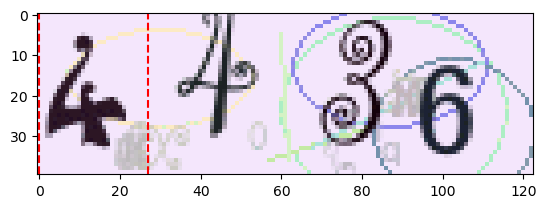

In [259]:
plt.imshow(captcha_sets['4436'])
plt.axvline(0, color='red', linestyle='--')
plt.axvline(27, color='red', linestyle='--')
#plt.axis('off')

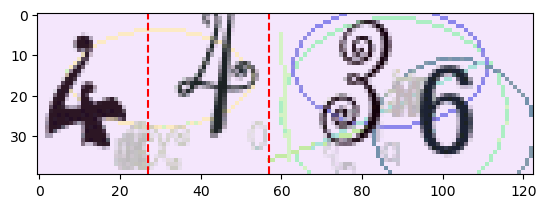

In [260]:
plt.imshow(captcha_sets['4436'])
plt.axvline(27, color='red', linestyle='--')
plt.axvline(57, color='red', linestyle='--')
#plt.axis('off')

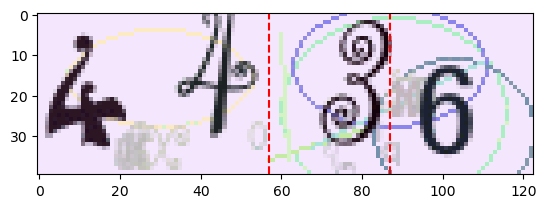

In [261]:
plt.imshow(captcha_sets['4436'])
plt.axvline(57, color='red', linestyle='--')
plt.axvline(87, color='red', linestyle='--')
#plt.axis('off')

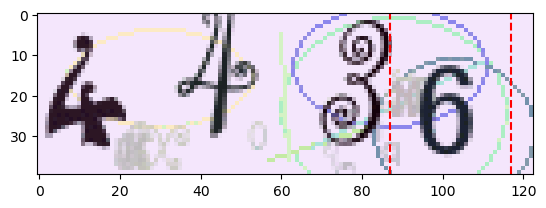

In [262]:
plt.imshow(captcha_sets['4436'])
plt.axvline(87, color='red', linestyle='--')
plt.axvline(117, color='red', linestyle='--')
#plt.axis('off')

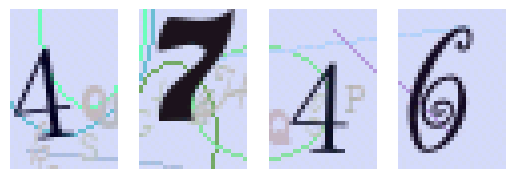

In [263]:
for i, image in enumerate(crop_digits(captcha_sets[np.random.choice(list(captcha_sets.keys()))])):
    plt.subplot(1, 4, i+1)
    plt.imshow(image)
    plt.axis('off')

# Generate X, Y

In [264]:
def generate_Xy():
    X = []
    y = []

    for number, captcha in captcha_sets.items():
        y.extend(list(map(int, list(number))))
        
        X.extend(list(crop_digits(captcha)))
            
    return np.array(X), np.array(y)

In [265]:
X, Y = generate_Xy()

X = X/255

X = X.mean(axis=3).reshape(-1, 40, 27, 1)

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

# Model Architecture

In [267]:
model = Sequential()
model.add(Conv2D(16, 2, activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(2))
model.add(Conv2D(16, 4, activation='relu', padding='same'))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 4, activation='relu', padding='same'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 40, 27, 16)        80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 13, 16)        4112      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 6, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 6, 32)         8224      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 3, 32)        

In [268]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [269]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/15
108/108 [==============================] - 6s 47ms/step - loss: 2.2087 - accuracy: 0.1841 - val_loss: 1.7562 - val_accuracy: 0.4319
Epoch 2/15
108/108 [==============================] - 4s 37ms/step - loss: 0.8783 - accuracy: 0.7263 - val_loss: 0.4608 - val_accuracy: 0.8822
Epoch 3/15
108/108 [==============================] - 5s 46ms/step - loss: 0.2432 - accuracy: 0.9331 - val_loss: 0.2361 - val_accuracy: 0.9476
Epoch 4/15
108/108 [==============================] - 7s 63ms/step - loss: 0.1251 - accuracy: 0.9677 - val_loss: 0.1762 - val_accuracy: 0.9686
Epoch 5/15
108/108 [==============================] - 5s 44ms/step - loss: 0.0705 - accuracy: 0.9823 - val_loss: 0.1809 - val_accuracy: 0.9764
Epoch 6/15
108/108 [==============================] - 6s 51ms/step - loss: 0.0416 - accuracy: 0.9901 - val_loss: 0.1557 - val_accuracy: 0.9817
Epoch 7/15
108/108 [==============================] - 6s 55ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 0.1690 - val_accuracy: 0.9686

In [271]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.xlabel('Epoch')

In [ ]:
plot_history(history)